In [1]:
from dolo import *
from matplotlib import pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
model = yaml_import("../models/consumption_savings_iid.yaml")

In [3]:
dr = time_iteration(model)

---------------------------------------------------
| Start Time Iterations.                          |
---------------------------------------------------
| N    | Error     | Gain      | Time      | nit  |
---------------------------------------------------
|    1 | 8.900e-01 |       nan | 1.270e+00 |    5 |
|    2 | 4.769e-03 | 5.359e-03 | 7.738e-03 |    4 |
|    3 | 4.795e-03 | 1.005e+00 | 8.647e-03 |    4 |
|    4 | 4.818e-03 | 1.005e+00 | 1.207e-02 |    5 |
|    5 | 4.843e-03 | 1.005e+00 | 1.100e-02 |    5 |
|    6 | 4.870e-03 | 1.006e+00 | 7.992e-03 |    5 |
|    7 | 4.894e-03 | 1.005e+00 | 8.563e-03 |    5 |
|    8 | 4.921e-03 | 1.005e+00 | 8.918e-03 |    5 |
|    9 | 4.947e-03 | 1.005e+00 | 9.070e-03 |    4 |
|   10 | 4.973e-03 | 1.005e+00 | 7.286e-03 |    4 |
|   11 | 4.999e-03 | 1.005e+00 | 8.590e-03 |    5 |
|   12 | 5.024e-03 | 1.005e+00 | 5.781e-03 |    4 |
|   13 | 5.051e-03 | 1.005e+00 | 8.318e-03 |    4 |
|   14 | 5.077e-03 | 1.005e+00 | 8.191e-03 |    4 |
|   15 | 5.1

One can also try the faster version

## Stochastic Simulations

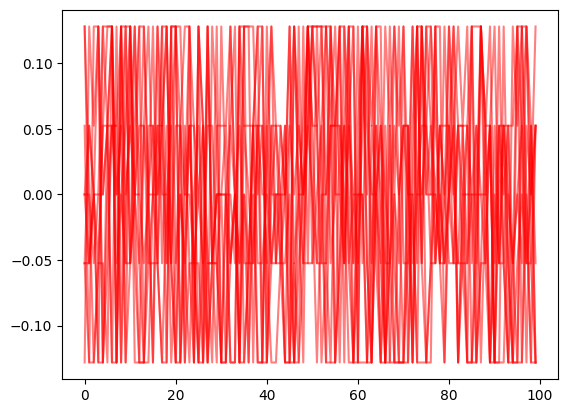

In [4]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [5]:
sim = simulate(model, dr, i0=1, N=100)

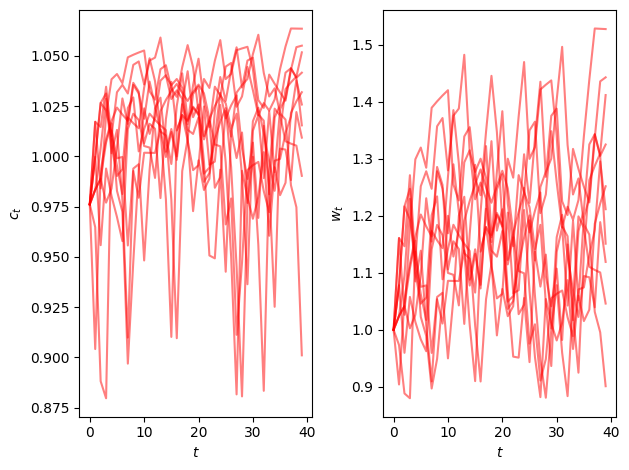

In [6]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [7]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 0, '$w$')

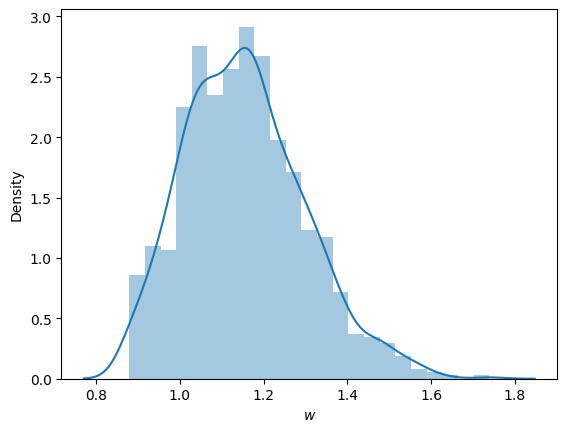

In [8]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [9]:
tab = tabulate(model, dr,'w')

In [10]:
from matplotlib import pyplot as plt

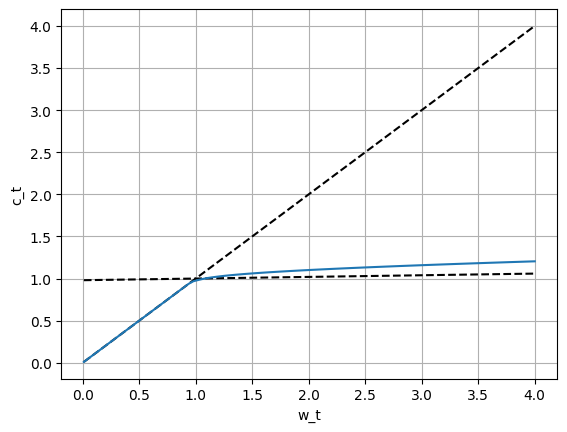

In [11]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()